### **Data Visualization**

##### Available libraries: Matplotlib, Seaborn, Plotly

In [1]:
import pandas as pd
import numpy as np

In [2]:
# load retail csv
path_retail = 'Pandas Course Resources/retail/transactions.csv'
# argument parse_dates=['name_of_date_column'] will attempt to convert to datetime datatype when reading file
transactions = pd.read_csv(path_retail, parse_dates=['date'])
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [3]:
transactions.dtypes

date            datetime64[ns]
store_nbr                int64
transactions             int64
dtype: object

#### **Matplotlib** </br> Plot Method `.plot()` creates lines chart by default </br> Using `row index as x-axis` </br> plots `each numerical column as separate series on y-axis`

#### **Chart Types**
| Type     | .plot.`kind`()    |Description       |
|----------------|---------|-----------------------------------------------|
| `Line Charts` | .plot() Default | Used to show trends and changes over time |
| `Bar Charts` Vertical | .plot.`bar`() | Vertical bars used for making comparisons with categorical data |
| `Bar Charts` Horizontal | .plot.`barh`() | Horizontal bars used for making comparisons with categorical data |
| `Histograms` | .plot.`hist`() | Used to plot the frequency of data points in bins |
| `Box Plots` | .plot.`box`() | Used to show distributions with respect to categories |
| `Area Charts` | .plot.`area`() | Filled area plots used to show cumulative totals over time |
| `Scatter Plots` | .plot.`scatter`() | Used to show the relationship between two variables |
| `Pie Charts` | .plot.`pie`() | Circular charts used to show proportional data in a pie-slice format |
| `Density Plots` | .plot.`kde`() or .plot.`density`() | Used for visualizing the distribution of a dataset |


##### **Plot Method** </br> Calling `.plot()` on pivot tables make good plots

<Axes: >

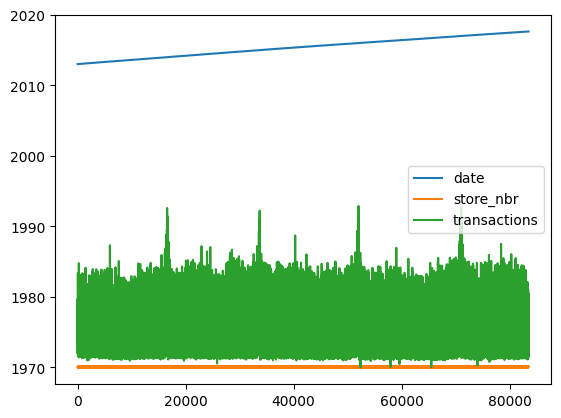

In [4]:
# plot aggregated sample_df using .plot()
transactions.plot()

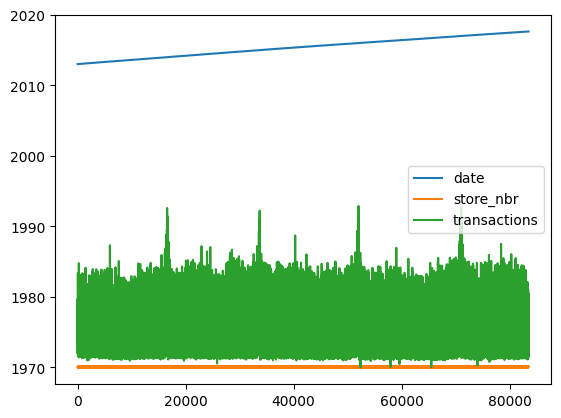

In [5]:
# to remove <Axes: > from output add ; to end of code
transactions.plot();

##### **Change x-axis**</br> By setting a `different index` </br> &nbsp;&nbsp;&nbsp;&nbsp;`pd.set_index('column_to_be_x').plot()` </br> or using `x argument` </br> &nbsp;&nbsp;&nbsp;&nbsp;`pd.plot(x='column_to_be_x')`

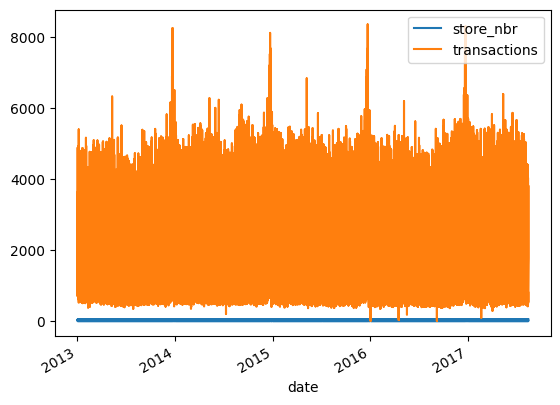

In [6]:
# using .set_index('column_to_be_x_axis') with ; to remove notebook header
transactions.set_index('date').plot();

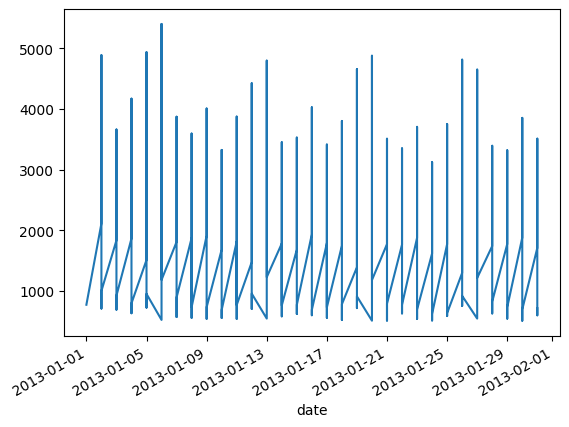

In [7]:
# using .set_index('column_to_be_x_axis'), use .loc[] for '2013-01' values and 'transactions' column
# with ; to remove notebook header
transactions.set_index('date').loc['2013-01','transactions'].plot();
# being that each date has multiple store_nbr values plot cannot extrapolate how to connect time series

##### **Can chain query() method before plot to filter plot visualization** </br> `Better to create filtered DataFrame first for plot`

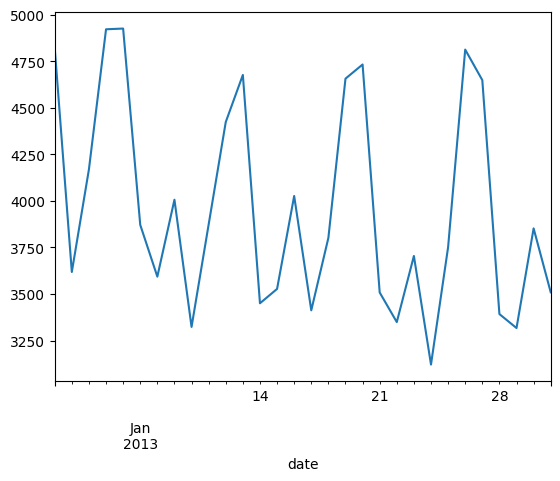

In [8]:
# can query specific store_nbr value to have time series plot
transactions.query("store_nbr == 44").set_index('date').loc['2013-01','transactions'].plot();
# creates plot for only store 44

In [9]:
# create filtered DataFrame using .loc accessor to filter for Store 44, and including 'date' and 'transactions' columns and then reset index
trans_44 = transactions.loc[transactions['store_nbr'] == 44, ['date','transactions']].reset_index(drop=True)
trans_44

,date,transactions
0,2013-01-02,4821
1,2013-01-03,3618
2,2013-01-04,4169
3,2013-01-05,4921
4,2013-01-06,4925
...,...,...
1672,2017-08-11,4418
1673,2017-08-12,4277
1674,2017-08-13,4392
1675,2017-08-14,4039


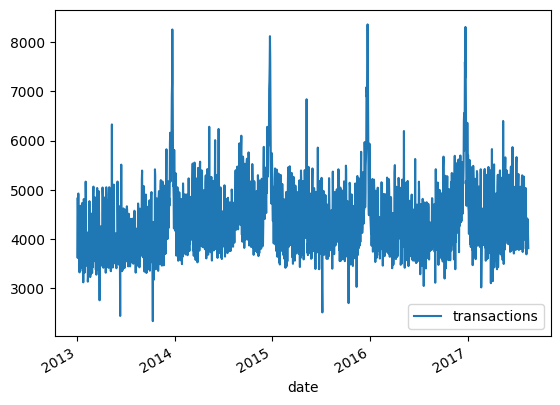

In [10]:
# generate timeseries for all datavalues of store 44
# plotting with 'x=column_for_x_axis) this doesn't alow the plot to be filtered when displayed
trans_44.plot(x='date');

<Axes: xlabel='date'>

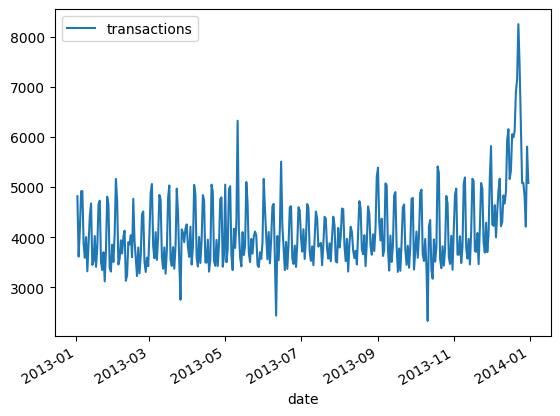

In [11]:
# using set_index('column_for_x_axis) allows for .loc to be used on the date column
trans_44.set_index('date').loc['2013'].plot()

In [12]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [13]:
# create pivot table for transactions by date for store_nbr
pivotStore44_47 = transactions.pivot_table(
    index='date',
    columns='store_nbr'
)
pivotStore44_47.head()

transactions                                                  \
store_nbr            1       2       3       4       5       6       7    
date                                                                      
2013-01-01          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2013-01-02       2111.0  2358.0  3487.0  1922.0  1903.0  2143.0  1874.0   
2013-01-03       1833.0  2033.0  3026.0  1551.0  1740.0  1795.0  1568.0   
2013-01-04       1863.0  2066.0  3188.0  1596.0  1642.0  1679.0  1513.0   
2013-01-05       1509.0  2062.0  3623.0  1825.0  1643.0  2154.0  1599.0   

                                    ...                                  \
store_nbr       8       9       10  ...      45      46      47      48   
date                                ...                                   
2013-01-01     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN   
2013-01-02  3250.0  2940.0  1293.0  ...  4208.0  4886.0  4161.0  3397.0   
2013-01-03  2904.0  2396.0  1157.0  ...  3314.0  3438.0  3660.0  2887.0   
2013-01-04  2962.0  1975.0   970.0  ...  3630.0  3434.0  3915.0  2900.0   
2013-01-05  3060.0  2604.0  1269.0  ...  4331.0  4935.0  4764.0  4084.0   

                                                   
store_nbr       49      50      51  52  53     54  
date                                               
2013-01-01     NaN     NaN     NaN NaN NaN    NaN  
2013-01-02  2346.0  3077.0  1985.0 NaN NaN  998.0  
2013-01-03  1702.0  2307.0  1644.0 NaN NaN  920.0  
2013-01-04  2016.0  2698.0  1786.0 NaN NaN  794.0  
2013-01-05  2562.0  3459.0  2068.0 NaN NaN  949.0  

[5 rows x 54 columns]

In [14]:
# modify pivot table for transactions by date for store_nbr
# drop column index level (axis=1)
pivotStore44_47 = transactions.pivot_table(
    index='date',
    columns='store_nbr',
).droplevel(0,axis=1)
pivotStore44_47.head()

store_nbr,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,2111.0,2358.0,3487.0,1922.0,1903.0,2143.0,1874.0,3250.0,2940.0,1293.0,...,4208.0,4886.0,4161.0,3397.0,2346.0,3077.0,1985.0,NaN,NaN,998.0
2013-01-03,1833.0,2033.0,3026.0,1551.0,1740.0,1795.0,1568.0,2904.0,2396.0,1157.0,...,3314.0,3438.0,3660.0,2887.0,1702.0,2307.0,1644.0,NaN,NaN,920.0
2013-01-04,1863.0,2066.0,3188.0,1596.0,1642.0,1679.0,1513.0,2962.0,1975.0,970.0,...,3630.0,3434.0,3915.0,2900.0,2016.0,2698.0,1786.0,NaN,NaN,794.0
2013-01-05,1509.0,2062.0,3623.0,1825.0,1643.0,2154.0,1599.0,3060.0,2604.0,1269.0,...,4331.0,4935.0,4764.0,4084.0,2562.0,3459.0,2068.0,NaN,NaN,949.0


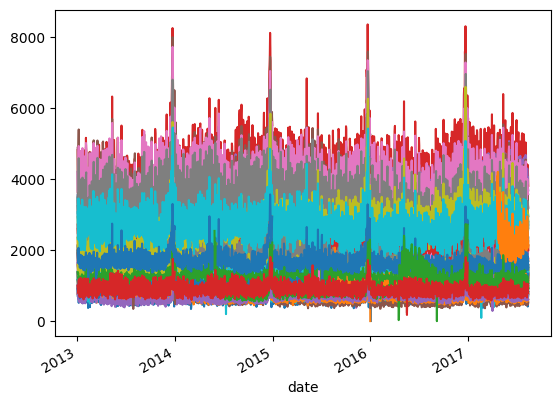

In [15]:
# removed legend because it had all the stores listed
pivotStore44_47.plot(legend=False);


In [16]:
# can use query() with pivot table creation, 
querypivotStore44_47 = transactions.query("store_nbr in [44,47]").pivot_table(
    index='date',
    columns='store_nbr',
).droplevel(0,axis=1)
querypivotStore44_47.head()

store_nbr,44,47
date,,
2013-01-02,4821.0,4161.0
2013-01-03,3618.0,3660.0
2013-01-04,4169.0,3915.0
2013-01-05,4921.0,4764.0
2013-01-06,4925.0,4935.0


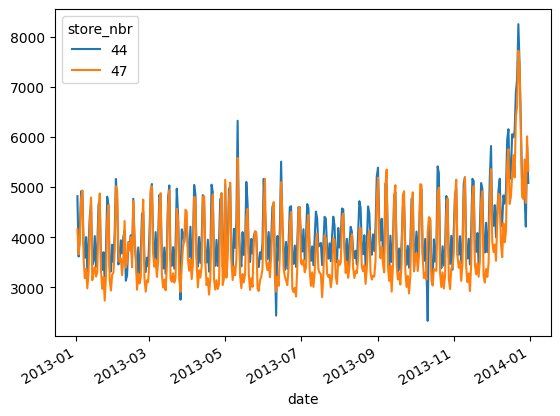

In [17]:
# having pivot_table with date as index will make it the index in the plot
# can then use .loc[''] to filter x-axis for specific date
querypivotStore44_47.loc['2013'].plot();

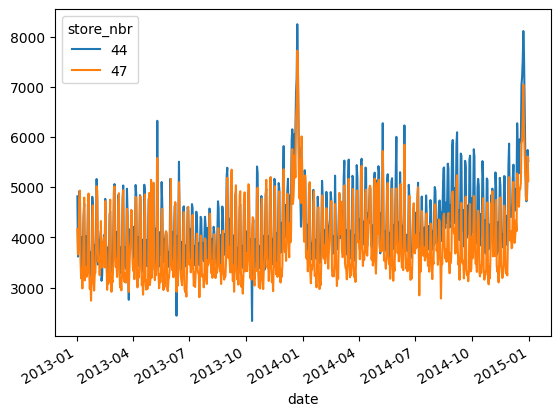

In [18]:
# having pivot_table with date as index will make it the index in the plot
# can then use .loc[''] to filter x-axis for specific range of date
querypivotStore44_47.loc['2013':'2014'].plot();

In [19]:
pivotStore44_47.head()

store_nbr,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,2111.0,2358.0,3487.0,1922.0,1903.0,2143.0,1874.0,3250.0,2940.0,1293.0,...,4208.0,4886.0,4161.0,3397.0,2346.0,3077.0,1985.0,NaN,NaN,998.0
2013-01-03,1833.0,2033.0,3026.0,1551.0,1740.0,1795.0,1568.0,2904.0,2396.0,1157.0,...,3314.0,3438.0,3660.0,2887.0,1702.0,2307.0,1644.0,NaN,NaN,920.0
2013-01-04,1863.0,2066.0,3188.0,1596.0,1642.0,1679.0,1513.0,2962.0,1975.0,970.0,...,3630.0,3434.0,3915.0,2900.0,2016.0,2698.0,1786.0,NaN,NaN,794.0
2013-01-05,1509.0,2062.0,3623.0,1825.0,1643.0,2154.0,1599.0,3060.0,2604.0,1269.0,...,4331.0,4935.0,4764.0,4084.0,2562.0,3459.0,2068.0,NaN,NaN,949.0


In [20]:
# if created a pivot table then can filter using standard pandas bracket notation
pivotStore44_47.loc[:,[44,47]].head()

store_nbr,44,47
date,,
2013-01-01,NaN,NaN
2013-01-02,4821.0,4161.0
2013-01-03,3618.0,3660.0
2013-01-04,4169.0,3915.0
2013-01-05,4921.0,4764.0


##### **Chart Formatting** </br> Can modify chart formatting using `arguments` for .plot() method

#### **Commonly Used Arguments**
| Argument| Description|
|---|----------|
| `alpha=`| `value_0_to_1` to control plot transparency (0 is invisible, .5 is semi transparent and 1 is not transparent)|
| `color=`| `'color'` or `'#hexcode'` Specifies the color(s) of the plot elements. Can be a single color format string, or a list/array of colors if plotting multiple columns (corporate branding may provide hexcodes for visual)|
| `colormap=`| `'color palette'` for the plot `'use cmap='' in matplotlib`|
| `colorbar=`| `True/False` add a colorbar (relevant for 'scatter' and 'hexbin')|
| `figsize=`| `(width, height)` in inches specifying figure dimensions|
| `fontsize=`| `float_value` Font size for tick labels, default = None|
| `grid=`| `True/False` include axis grid lines|
| `kind=`| `'plot_type;` Specifies the type `('line', 'bar', 'barh', 'box', 'hist', 'kde' or 'density', 'area', 'pie').` </br> for DataFrame only -> `'scatter' or 'hexbin'`|
| `legend=`| `True/False` Add/Remove the legend|
| `logx=`| `True/False` Use logarithmic scaling on the x-axis, default = False|
| `logy=`| `True/False` Use logarithmic scaling on the y-axis, default = False|
| `loglog=`| `True/False` Use logarithmic scaling on both x and y axes, default = False|
| `rot=`| `degrees` Rotation angle for a-axis label ticks (0-360)|
| `stacked=`| `True/False` Whether to stack the data in line, bar, or area plots|
| `style=`| `'line_style'` style for the line (dash, dotted)|
| `table=`| `True/False` True draws table with the DataFrame data transposed|
| `title=`| `'title'` for the plot; if a list and `subplots=True`, each subplot gets a title from the list|
| `use_index=`| `True/False` Whether to use the DataFrame index for x-axis (default True)|
| `xlabel=`| `'x-axis title'` Title for the x-axis|
| `ylabel=`| `'y-axis title'` Title for the y-axis|
| `xlim=`| `(min,max)` Limits for the x-axis min and max values|
| `ylim=`| `(min,max)` Limits for the y-axis min and max values|
| `xticks=`| Values to use for x-axis ticks `- see Pandas Documentation`|
| `yticks=`| Values to use for y-axis ticks `- see Pandas Documentation`|
| `subplots=`| `True/False`Make separate subplots for each column/defined group of columns Default=False - No subplots used, True - Make separate subplots for each column|
|------------|--- **These arguments used when `subplots=True`* ---|
| `sharex=`| `True/False`, True has each subplot series sharing the x-axis|
| `sharey=`| `True/False`, True has each subplot series sharing the y-axis|
| `layout=`| `(rows,columns)` rows/columns to break the subplots into|


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

#### **When to use `.set_index('column_for_x-axis)` vs. </br> `.plot(use_index='column_for_x-axis)`*
| Feature                          | `use_index=` in `.plot()`              | `.set_index().plot()`                  |
|----------------------------------|----------------------------------------|----------------------------------------|
| **Purpose**                      | Controls whether the DataFrame's index is used as the x-axis in a plot. | Changes the DataFrame's index to a specified column before plotting. |
| **DataFrame Modification**       | Does not alter the DataFrame; only affects the plot. | Modifies the DataFrame by setting a new index, affecting all subsequent operations. |
| **Use Case**                     | Ideal for quick plots where the DataFrame’s current index is suitable for the x-axis. | Useful when the index needs to be structurally integrated into the DataFrame for repeated use or specific analyses. |
| **Impact on Data Analysis**      | Minimal, as it only affects visualization. | Significant, as it changes the DataFrame's structure and can influence further data manipulations. |


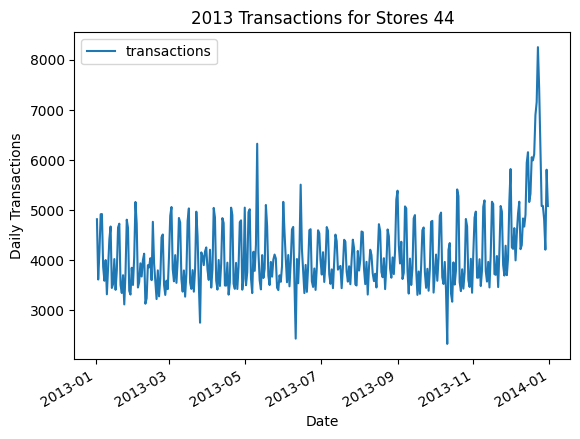

In [21]:
# add custom chart label, x-axis label, y-axis label to trans_44 Dataframe Plot
trans_44.set_index('date').loc['2013-01':'2013-12'].plot(
    title='2013 Transactions for Stores 44',
    xlabel='Date',
    ylabel='Daily Transactions',
);

##### **Series Color** </br> Can modify colors for each series using `color names` or `hex codes`

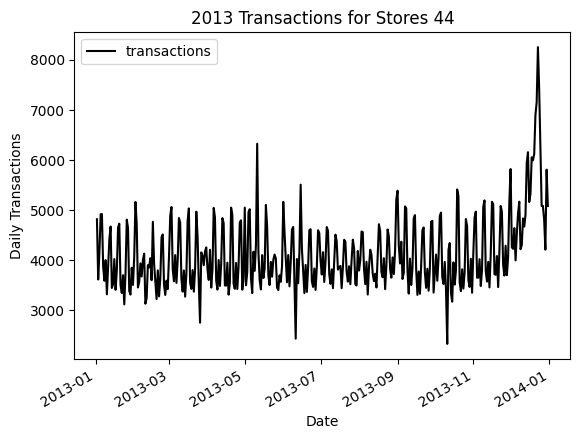

In [22]:
# add color to line series and custom chart label, x-axis label, y-axis label to trans_44 Dataframe Plot
trans_44.set_index('date').loc['2013-01':'2013-12'].plot(
    title='2013 Transactions for Stores 44',
    xlabel='Date',
    ylabel='Daily Transactions',
    color='black'
);

##### **For Multiple Series** </br> Provide list of colors and they will be applied based on DataFrame column index

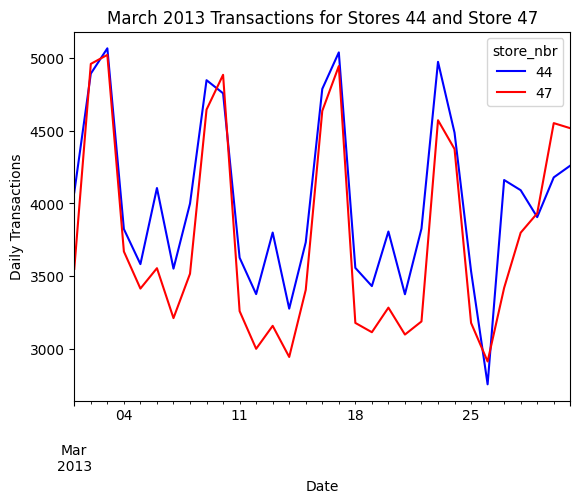

In [23]:
# add multiple colors to Store 44 and 47 pivot table -> pivot table has date as index already (.set_index() not required) 
# add custom chart label, x-axis label, y-axis label
querypivotStore44_47.loc['2013-03-01':'2013-03-31'].plot(
    title='March 2013 Transactions for Stores 44 and Store 47',
    xlabel='Date',
    ylabel='Daily Transactions',
    color=['blue','red'] # or hexcodes blue=#0000FF and red= #FF0000 (from internet)
);

##### **Color Palettes** </br> `colormap=` or `cmap=` will use a palette of colors that will repeat if series exceeds the list of colors in that colormap
https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [24]:
# these colormaps options can also be used in pandas .plot() method
import matplotlib.pyplot as plt
colorlist = plt.colormaps()
colorlist = np.array(colorlist)
colorlist.sort()
print(colorlist)


['Accent' 'Accent_r' 'Blues' 'Blues_r' 'BrBG' 'BrBG_r' 'BuGn' 'BuGn_r'
 'BuPu' 'BuPu_r' 'CMRmap' 'CMRmap_r' 'Dark2' 'Dark2_r' 'GnBu' 'GnBu_r'
 'Grays' 'Greens' 'Greens_r' 'Greys' 'Greys_r' 'OrRd' 'OrRd_r' 'Oranges'
 'Oranges_r' 'PRGn' 'PRGn_r' 'Paired' 'Paired_r' 'Pastel1' 'Pastel1_r'
 'Pastel2' 'Pastel2_r' 'PiYG' 'PiYG_r' 'PuBu' 'PuBuGn' 'PuBuGn_r' 'PuBu_r'
 'PuOr' 'PuOr_r' 'PuRd' 'PuRd_r' 'Purples' 'Purples_r' 'RdBu' 'RdBu_r'
 'RdGy' 'RdGy_r' 'RdPu' 'RdPu_r' 'RdYlBu' 'RdYlBu_r' 'RdYlGn' 'RdYlGn_r'
 'Reds' 'Reds_r' 'Set1' 'Set1_r' 'Set2' 'Set2_r' 'Set3' 'Set3_r'
 'Spectral' 'Spectral_r' 'Wistia' 'Wistia_r' 'YlGn' 'YlGnBu' 'YlGnBu_r'
 'YlGn_r' 'YlOrBr' 'YlOrBr_r' 'YlOrRd' 'YlOrRd_r' 'afmhot' 'afmhot_r'
 'autumn' 'autumn_r' 'binary' 'binary_r' 'bone' 'bone_r' 'brg' 'brg_r'
 'bwr' 'bwr_r' 'cividis' 'cividis_r' 'cool' 'cool_r' 'coolwarm'
 'coolwarm_r' 'copper' 'copper_r' 'cubehelix' 'cubehelix_r' 'flag'
 'flag_r' 'gist_earth' 'gist_earth_r' 'gist_gray' 'gist_gray_r'
 'gist_grey' 'gist_hea

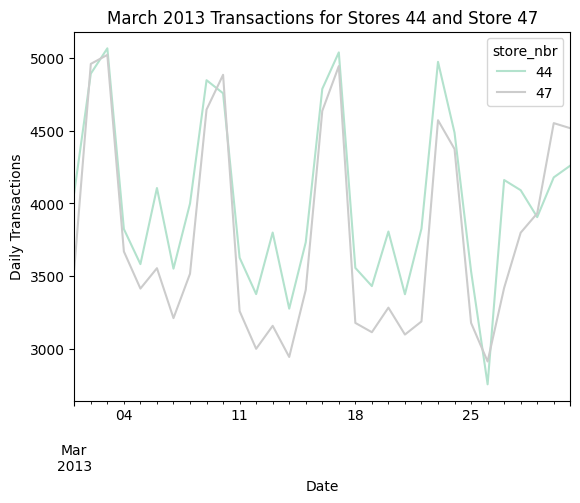

In [25]:
# add colormap to Store 44 and 47 pivot table -> pivot table has date as index already (.set_index() not required) 
# add custom chart label, x-axis label, y-axis label
querypivotStore44_47.loc['2013-03-01':'2013-03-31'].plot(
    title='March 2013 Transactions for Stores 44 and Store 47',
    xlabel='Date',
    ylabel='Daily Transactions',
    colormap='Pastel2'
);

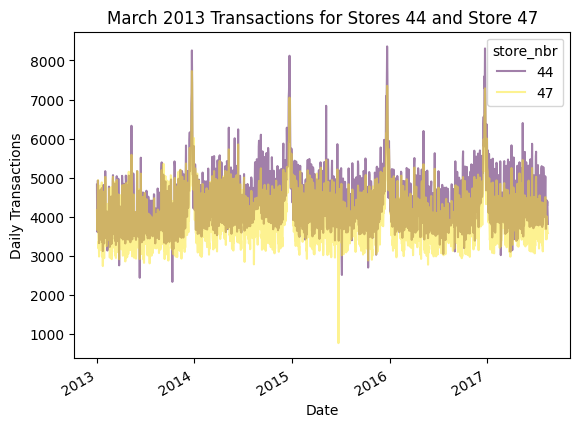

In [26]:
# setting alpha= argument value for transparency of plots for entire pivot_table date range at 50 percent
querypivotStore44_47.plot(
    title='March 2013 Transactions for Stores 44 and Store 47',
    xlabel='Date',
    ylabel='Daily Transactions',
    colormap='viridis',
    alpha=0.5
);

##### **Line Styles** </br> `style='line_style'` will change the style of the series and will take a list for multiple series.
| Symbol |Description|
|----|-----|
|`'-'` | Solid line (Default) or `'solid'`|
|`'--'` | Dashed line or  `'dashed'`|
|`'-.'` | Dash-dot line or `'dashdot'`|
|`':'` | Dotted line or `'dotted'`|

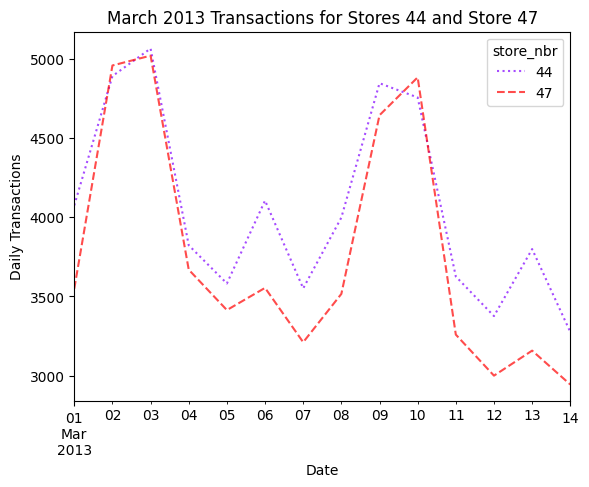

In [27]:
# change line styles for each store 44 (dotted), 47 (dashed)
# set transparency at 70 percent
querypivotStore44_47.loc['2013-03-01':'2013-03-14'].plot(
    title='March 2013 Transactions for Stores 44 and Store 47',
    xlabel='Date',
    ylabel='Daily Transactions',
    colormap='rainbow',
    style=[':','--'],
    alpha=.7
);

##### **Chart Legend** </br> `legend=True/False` False removes legend </br> plot() method finds optimal whitespace for legend

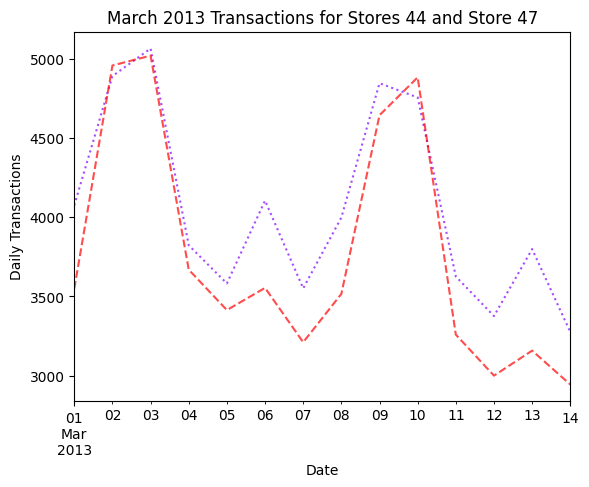

In [28]:
# remove legend
querypivotStore44_47.loc['2013-03-01':'2013-03-14'].plot(
    title='March 2013 Transactions for Stores 44 and Store 47',
    xlabel='Date',
    ylabel='Daily Transactions',
    colormap='rainbow',
    style=[':','--'],
    alpha=.7,
    legend=False
);

##### **Reposition Legend in Chart Area** </br> Chaining `.legend()` to `.plot()` method and specifying locations with: </br> `.legend(loc='description')` or </br> `.legend(loc=Location Value)` or </br> `.legend(loc=(x-coordinate,y-coordinate))` 


| Description        | Location Value | Coordinates Example       | Explanation                                                              |
|----------|----------|---------------|--------------------------------------------|
| `'best'`           | 0              | Not applicable            | Automatically chooses the best location to minimize interference with the plotted data. |
| `'upper right'`    | 1              | `(0.95, 0.95)`            | Places the legend in the upper right corner.                             |
| `'upper left'`     | 2              | `(0.05, 0.95)`            | Places the legend in the upper left corner.                              |
| `'lower left'`     | 3              | `(0.05, 0.05)`            | Places the legend in the lower left corner.                              |
| `'lower right'`    | 4              | `(0.95, 0.05)`            | Places the legend in the lower right corner.                             |
| `'right'`          | 5              | `(1.0, 0.5)`              | Places the legend on the right side.                                     |
| `'center left'`    | 6              | `(0.0, 0.5)`              | Places the legend in the center left side.                               |
| `'center right'`   | 7              | `(1.0, 0.5)`              | Places the legend in the center right side.                              |
| `'lower center'`   | 8              | `(0.5, 0.05)`             | Places the legend in the lower center.                                   |
| `'upper center'`   | 9              | `(0.5, 0.95)`             | Places the legend in the upper center.                                   |
| `'center'`         | 10             | `(0.5, 0.5)`              | Places the legend in the center of the axes/plot.                        |


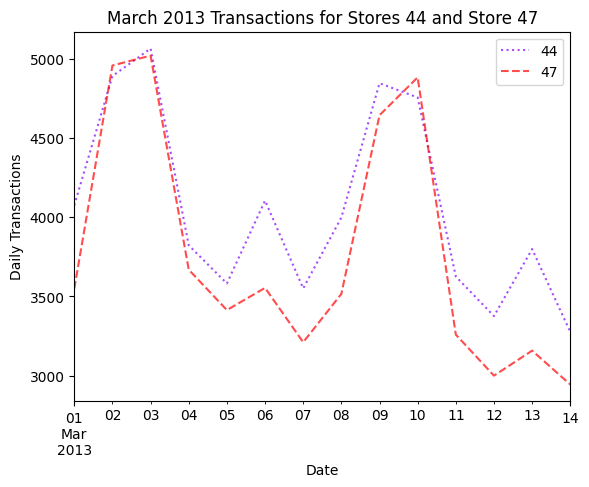

In [29]:
# repositioning legend using location description for best location -> loc='best'
querypivotStore44_47.loc['2013-03-01':'2013-03-14'].plot(
    title='March 2013 Transactions for Stores 44 and Store 47',
    xlabel='Date',
    ylabel='Daily Transactions',
    colormap='rainbow',
    style=[':','--'],
    alpha=.7
).legend(loc='best');

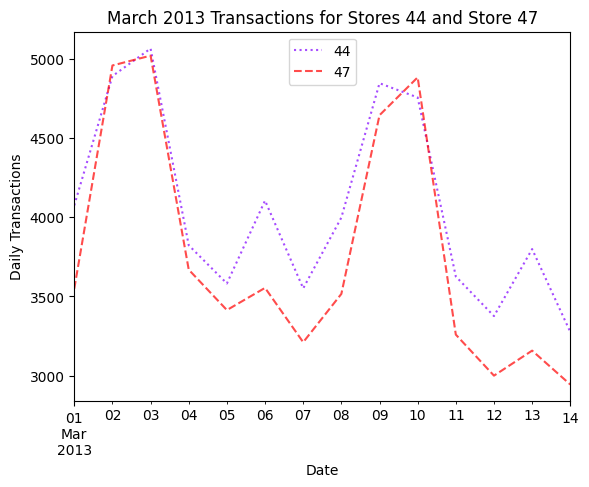

In [30]:
# repositioning legend using location value for Center -> loc=9
querypivotStore44_47.loc['2013-03-01':'2013-03-14'].plot(
    title='March 2013 Transactions for Stores 44 and Store 47',
    xlabel='Date',
    ylabel='Daily Transactions',
    colormap='rainbow',
    style=[':','--'],
    alpha=.7
).legend(loc=9);

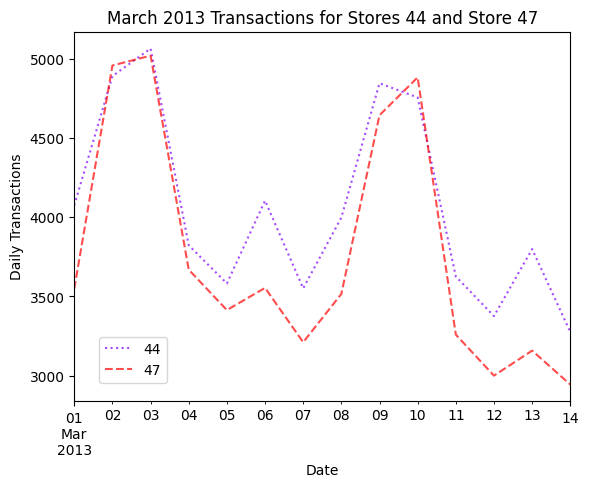

In [31]:
# repositioning legend using location coordinates for lower left -> loc=(0.05,0.05)
querypivotStore44_47.loc['2013-03-01':'2013-03-14'].plot(
    title='March 2013 Transactions for Stores 44 and Store 47',
    xlabel='Date',
    ylabel='Daily Transactions',
    colormap='rainbow',
    style=[':','--'],
    alpha=.7
).legend(loc=(0.05,0.05));

##### **Reposition Legend outside Chart Area** </br> Chaining `.legend()` to `.plot()` method and specifying locations with: </br> `.legend(bbox_to_anchor=(x-coordinate,y-coordinate))` </br> These coordinates will have to be manually adjusted to find proper location

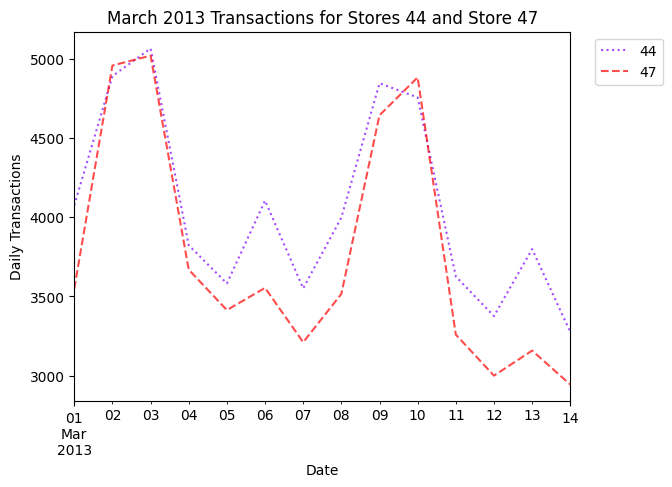

In [32]:
# repositioning legend outside chart area -> bbox_to_anchor=(1.2,1)) -> coordinates need to be played with until coordinates fit 
querypivotStore44_47.loc['2013-03-01':'2013-03-14'].plot(
    title='March 2013 Transactions for Stores 44 and Store 47',
    xlabel='Date',
    ylabel='Daily Transactions',
    colormap='rainbow',
    style=[':','--'],
    alpha=.7
).legend(bbox_to_anchor=(1.2,1));

##### **Gridlines** </br> Gridlines can be added to chart with argument: </br> `grid=True`

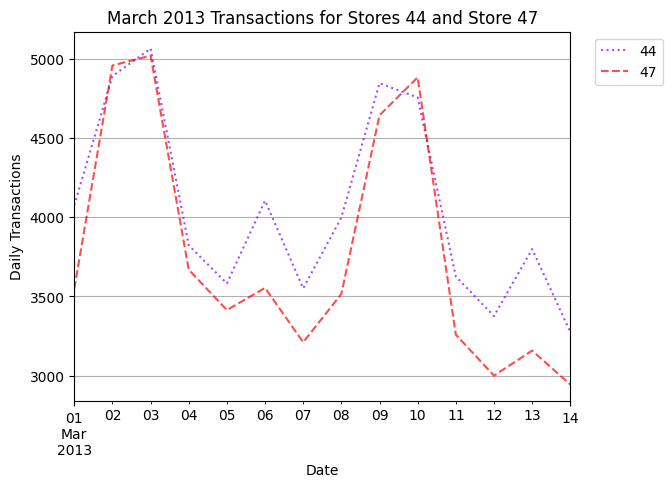

In [33]:
# adding gridlines to chart area
querypivotStore44_47.loc['2013-03-01':'2013-03-14'].plot(
    title='March 2013 Transactions for Stores 44 and Store 47',
    xlabel='Date',
    ylabel='Daily Transactions',
    colormap='rainbow',
    style=[':','--'],
    alpha=.7,
    grid=True
).legend(bbox_to_anchor=(1.2,1));

##### **Chart Styles** </br> `Matplotlib` and `Seaborn` have style templates </br> Once style is set, will automatically be applied to all charts </br> these have their fonts, colors, font sizes, etc

https://seaborn.pydata.org/tutorial/aesthetics.html    there are only 5 preset styles
https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html many styles

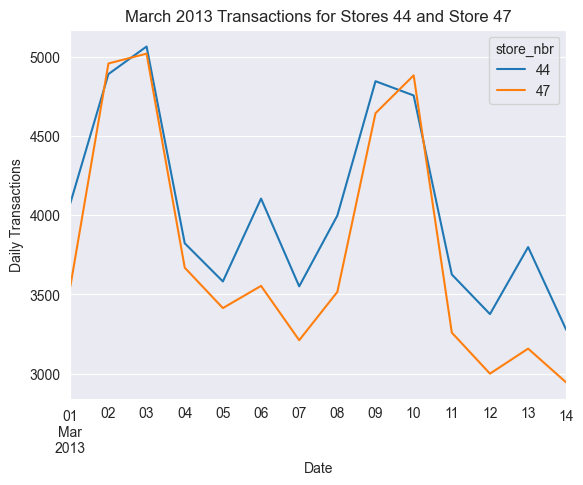

In [34]:
import seaborn as sns
# set seaborn template style to be used for all charts
sns.set_style('darkgrid')

querypivotStore44_47.loc['2013-03-01':'2013-03-14'].plot(
    title='March 2013 Transactions for Stores 44 and Store 47',
    xlabel='Date',
    ylabel='Daily Transactions',
);

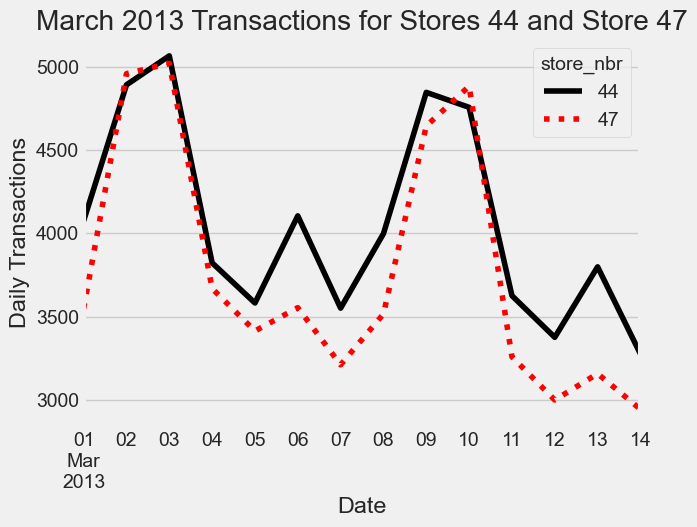

In [35]:
import matplotlib

# set matplotlib template style to be used for all charts
# matplotlib.style.use('fivethirtyeight')

# cannot use seaborn and matplotlib in same notebook, but if wanting to use a 
# matplotlib style for a plot, then use style.context('style_template)
# with matplotlib.style.context(.context)
with matplotlib.style.context('fivethirtyeight'):
    querypivotStore44_47.loc['2013-03-01':'2013-03-14'].plot(
        title='March 2013 Transactions for Stores 44 and Store 47',
        xlabel='Date',
        ylabel='Daily Transactions',
        color=['black','red'],
        style=['-',':']
    );

##### **Subplots** </br> Argument `subplots=True` </br> Creates one figure that has separate chart for each series
| Arguments | Description |
|-------|------|
| `figsize=`| `(width, height)` in inches specifying figure dimensions|
| `subplots=`| `True/False`Make separate subplots for each column/defined group of columns Default=False - No subplots used, True - Make separate subplots for each column|
|------------|--- **These arguments used when `subplots=True`* ---|
| `sharex=`| `True/False`, True has each subplot series sharing the x-axis|
| `sharey=`| `True/False`, True has each subplot series sharing the y-axis|
| `layout=`| `(rows,columns)` rows/columns to break the subplots into|
| `title=`| `['Chart Titles based on Column Order']` Titles for each chart|

In [36]:
# Create pivot table for all stores transactions by date
StorePivot = transactions.pivot_table(
    index='date',
    columns='store_nbr',
).droplevel(0,axis=1)

# Filter pivot table for only Stores 1 to 4 -> have to use iloc[: , 0:4] because of pivot table
Store1to4Pivots = StorePivot.iloc[:, 0:4]
Store1to4Pivots

store_nbr,1,2,3,4
date,,,,
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
...,...,...,...,...
2017-08-11,570.0,1698.0,2991.0,1301.0
2017-08-12,1004.0,1613.0,3070.0,1304.0
2017-08-13,416.0,1658.0,3075.0,1378.0


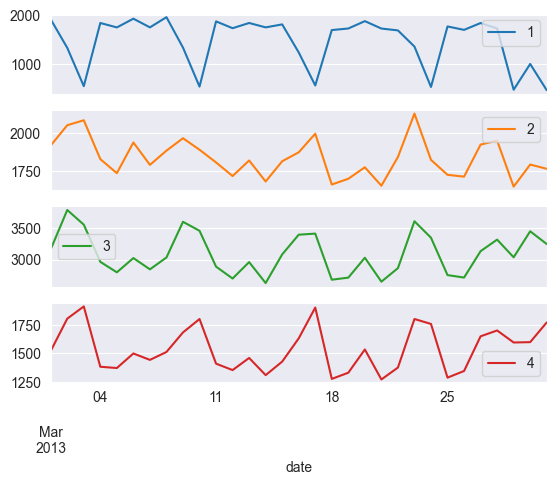

In [37]:
# filter pivot table to have x-axis be for the march of 2013
Store1to4Pivots.loc['2013-03'].plot(subplots=True);

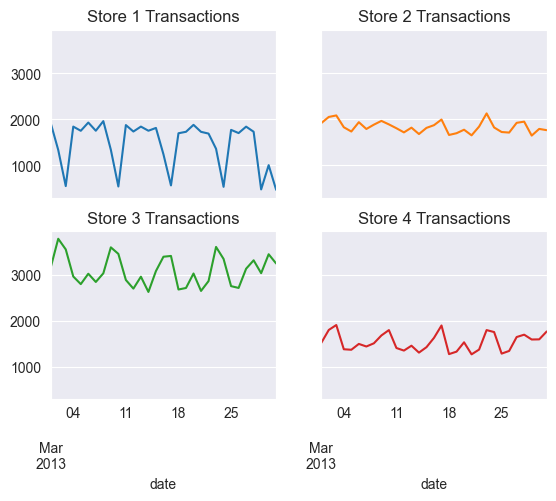

In [38]:
# customize chart figure -> 2 columns, 2 rows of charts, charts share y-axis, no legend, all charts have titles
Store1to4Pivots.loc['2013-03'].plot(
    # create subplots for pivot table columns
    subplots=True,
    # have the figure display charts in 2 rows and 2 columns
    layout=(2,2),
    # use sharey to have the same y-axis values for all charts
    sharey=True,
    # legend not required because Title of charts indicate what they are
    legend=False,
    # this labels the each subplot and need to be in order of plot columns
    title=['Store 1 Transactions', 'Store 2 Transactions', 'Store 3 Transactions', 'Store 4 Transactions']    
    );

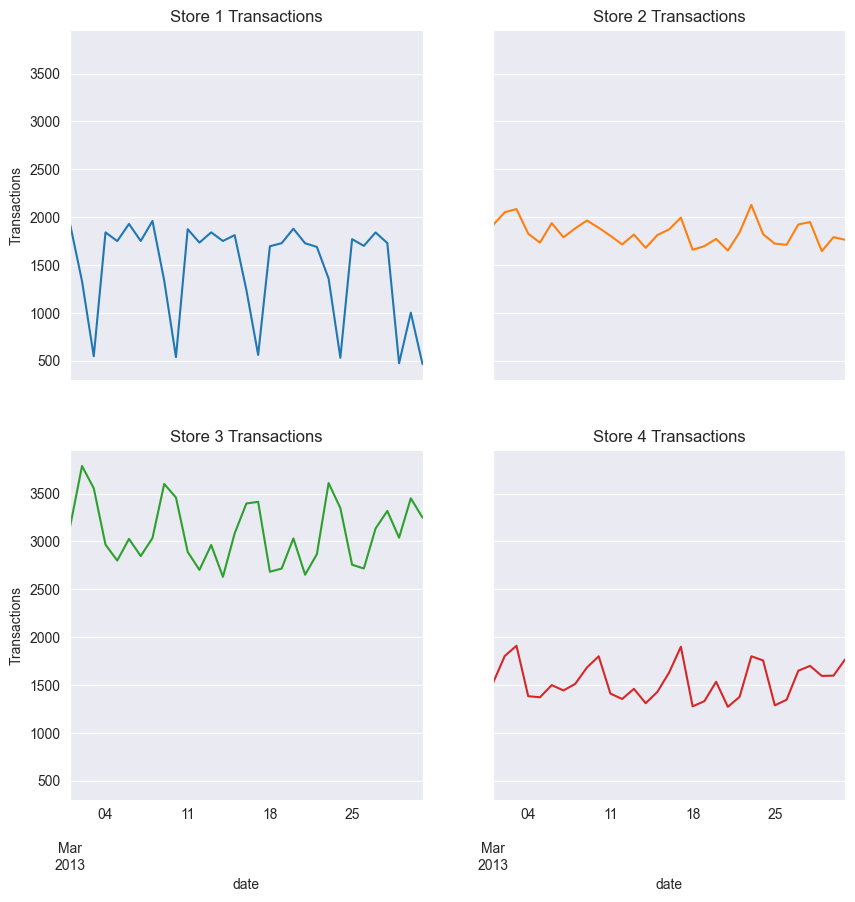

In [39]:
# increase figure size to be 8X8
Store1to4Pivots.loc['2013-03'].plot(
    # create subplots for pivot table columns
    subplots=True,
    # increase figure size (width,height)
    figsize=(10,10),
    # have the figure display charts in 2 rows and 2 columns
    layout=(2,2),
    # label y-axis
    ylabel='Transactions',
    # use sharey to have the same y-axis values for all charts
    sharey=True,
    # legend not required because Title of charts indicate what they are
    legend=False,
    # this labels the each subplot and need to be in order of plot columns
    title=['Store 1 Transactions', 'Store 2 Transactions', 'Store 3 Transactions', 'Store 4 Transactions']    
    );

##### **Changing Chart Types** </br> Argument `kind='chart_type'` </br> Can chain .chart_type to .plot() method `.plot.chart_type()`

#### **Chart Types**
| Type     | .plot.`kind`()    |Description       |
|----------------|---------|-----------------------------------------------|
| `Line Charts` | .plot() Default | Used to show trends and changes over time |
| `Bar Charts` Vertical | .plot.`bar`() | Vertical bars used for making comparisons with categorical data |
| `Bar Charts` Horizontal | .plot.`barh`() | Horizontal bars used for making comparisons with categorical data |
| `Histograms` | .plot.`hist`() | Used to plot the frequency of data points in bins |
| `Box Plots` | .plot.`box`() | Used to show distributions with respect to categories |
| `Area Charts` | .plot.`area`() | Filled area plots used to show cumulative totals over time |
| `Scatter Plots` | .plot.`scatter`() | Used to show the relationship between two variables |
| `Pie Charts` | .plot.`pie`() | Circular charts used to show proportional data in a pie-slice format |
| `Density Plots` | .plot.`kde`() or .plot.`density`() | Used for visualizing the distribution of a dataset |


In [84]:
# group by store prep for vertical bar chart for transaction total per store using dictionary to sum the transactions into the transaction column
transactions.groupby('store_nbr').agg({'transactions':'sum'}).head()

,transactions
store_nbr,
1,2553963
2,3219901
3,5366350
4,2519007
5,2347877


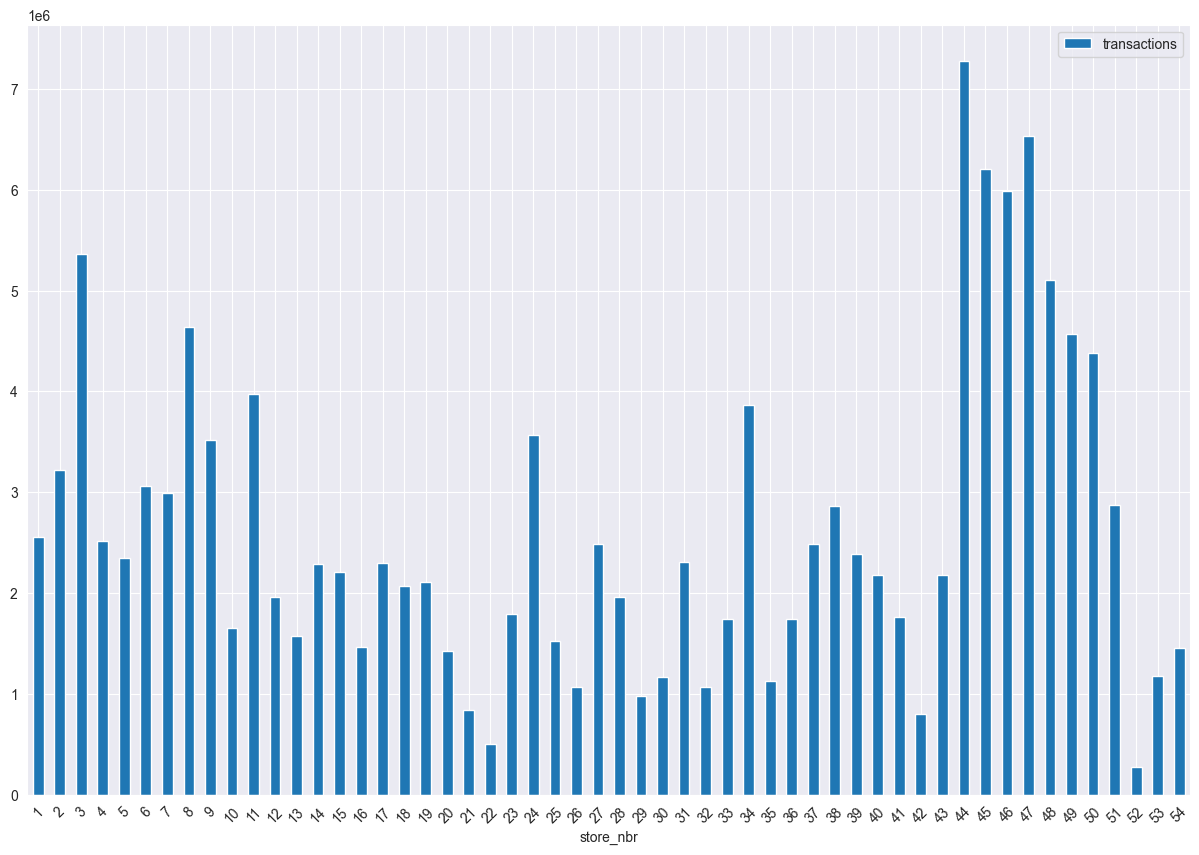

In [91]:
# vertical bar chart for transaction total per store using dictionary to sum the transactions into the transaction column
transactions.groupby('store_nbr').agg({'transactions':'sum'}).plot.bar(figsize=(15,10),
    rot=45);

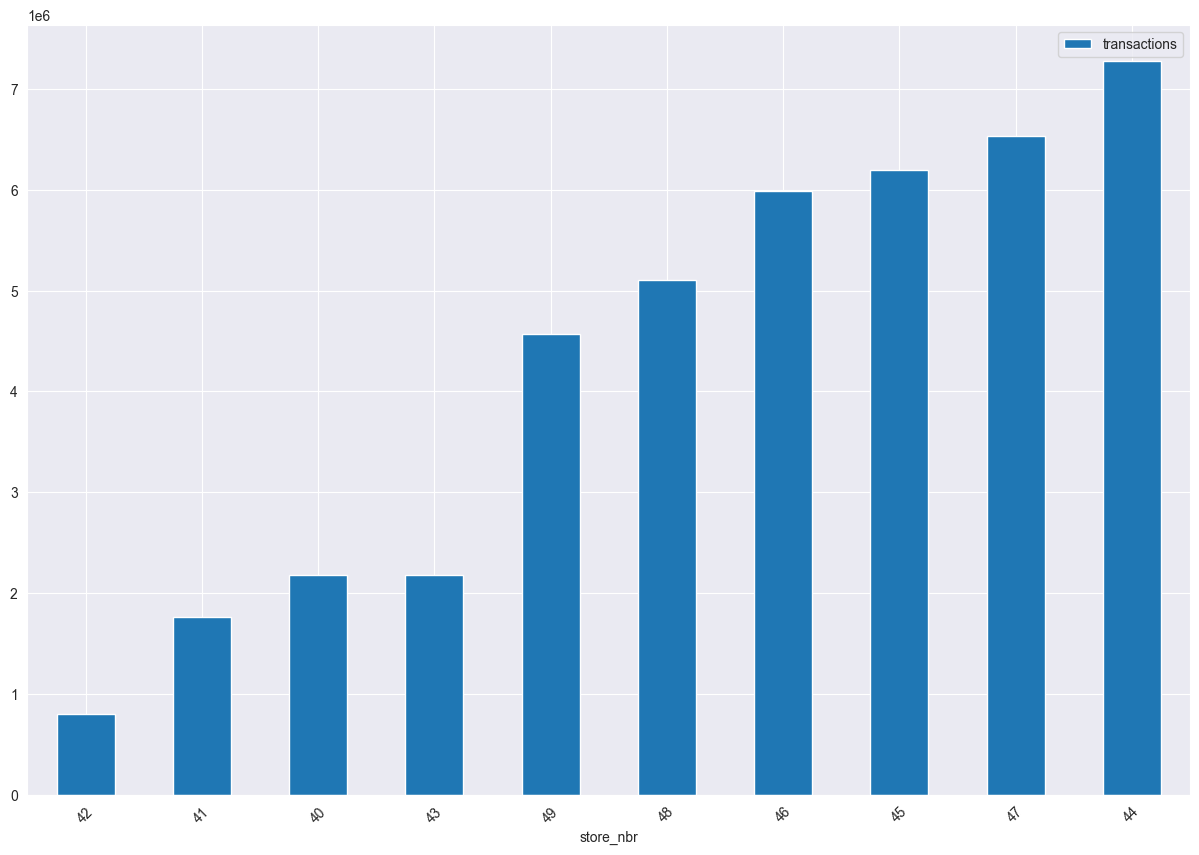

In [97]:
# create filter variable to query before plotting for store 40s using .query(column_name_to_filter in @variable_name)
# vertical bar chart for transaction total per store using dictionary to sum the transactions into the transaction column
store40s = list(range(40,50))
(
transactions
    .query("store_nbr in @store40s")
    .groupby('store_nbr')
    .agg({'transactions':'sum'})
    .sort_values(by='transactions')
    .plot.bar(
        figsize=(15,10),
        rot=45)
);

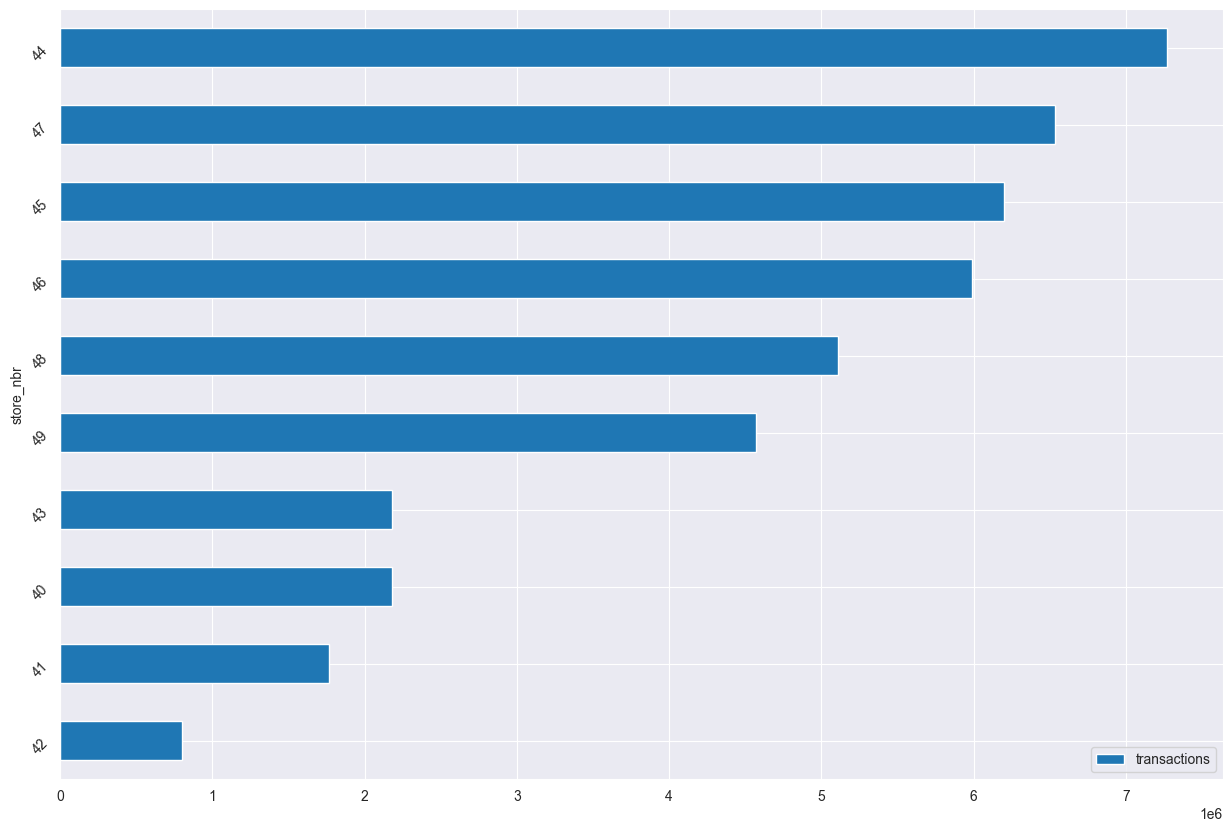

In [99]:
# create filter variable to query before plotting for store 40s using .query(column_name_to_filter in @variable_name)
# horizontal bar chart for transaction total per store using dictionary to sum the transactions into the transaction column
store40s = list(range(40,50))
(
transactions
    .query("store_nbr in @store40s")
    .groupby('store_nbr')
    .agg({'transactions':'sum'})
    .sort_values(by='transactions')
    # use .barh
    .plot.barh(
        figsize=(15,10),
        rot=45)
);

##### **Grouped Bar Charts** </br> Plotting multiple series with a bart plot will create `grouped bar chart`